P.BHARGAV KUMAR  
E22CSEU1064
B36

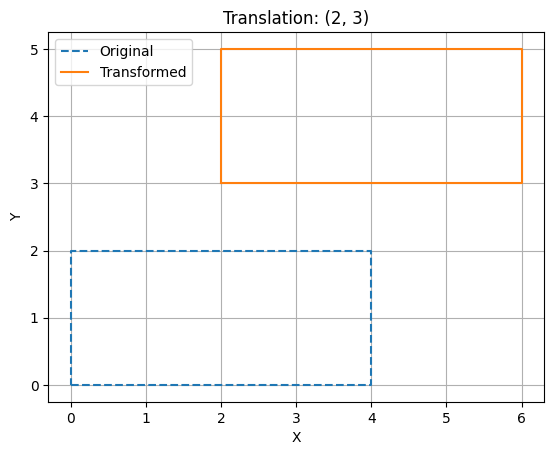

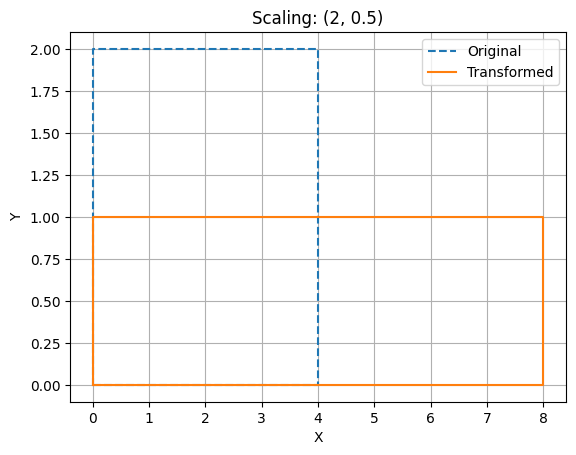

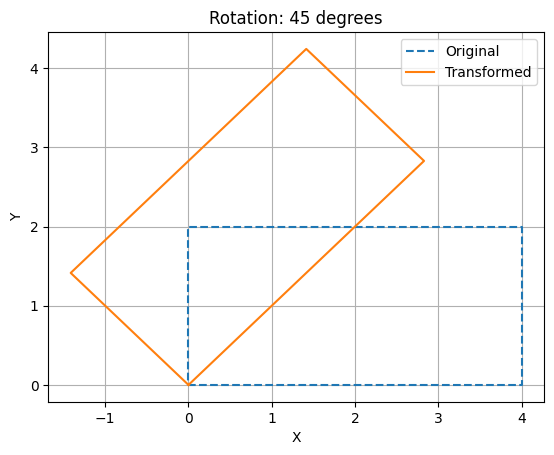

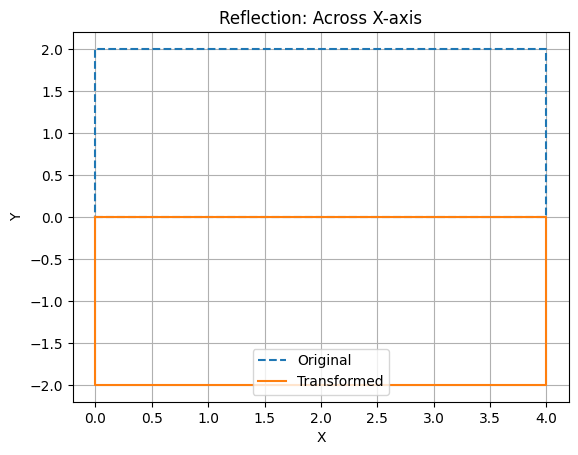

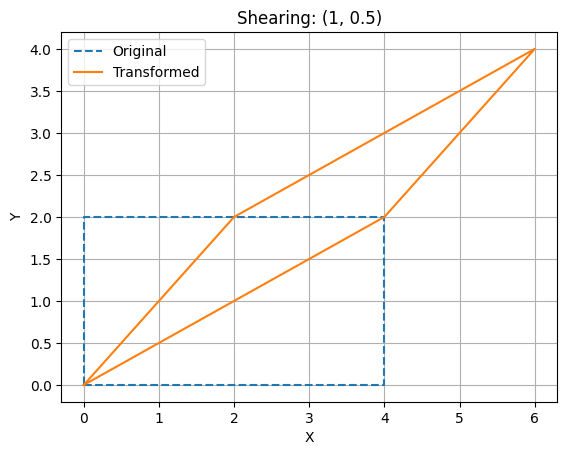

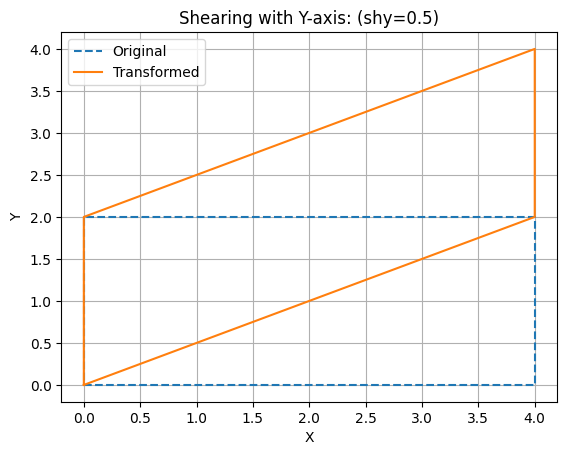

<Figure size 640x480 with 0 Axes>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

rectangle = np.array([
    [0, 0],
    [4, 0],
    [4, 2],
    [0, 2],
    [0, 0]
])

# Transformation Functions

def translate(points, tx, ty):
    translation_matrix = np.array([tx, ty])
    return points + translation_matrix

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    return points @ scaling_matrix.T

def rotate(points, theta):
    theta = np.radians(theta)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    return points @ rotation_matrix.T

def reflect_x(points):
    reflection_matrix = np.array([[1, 0], [0, -1]])
    return points @ reflection_matrix.T

def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx], [shy, 1]])
    return points @ shearing_matrix.T

def shear_y(points, shy):
    shearing_matrix = np.array([[1, 0], [shy, 1]])
    return points @ shearing_matrix.T

# Plotting Function
def plot_object(original, transformed, title):
    plt.figure()
    plt.plot(original[:, 0], original[:, 1], label="Original", linestyle='--')
    plt.plot(transformed[:, 0], transformed[:, 1], label="Transformed")
    plt.title(title)
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

# Apply Transformations
# 1. Translation
translated_rectangle = translate(rectangle, 2, 3)
plot_object(rectangle, translated_rectangle, "Translation: (2, 3)")

# 2. Scaling
scaled_rectangle = scale(rectangle, 2, 0.5)
plot_object(rectangle, scaled_rectangle, "Scaling: (2, 0.5)")

# 3. Rotation
rotated_rectangle = rotate(rectangle, 45)
plot_object(rectangle, rotated_rectangle, "Rotation: 45 degrees")

# 4. Reflection (across X-axis)
reflected_rectangle = reflect_x(rectangle)
plot_object(rectangle, reflected_rectangle, "Reflection: Across X-axis")

# 5. Shearing
sheared_rectangle = shear(rectangle, 1, 0.5)
plot_object(rectangle, sheared_rectangle, "Shearing: (1, 0.5)")

sheared_y_rectangle = shear_y(rectangle, 0.5)
plot_object(rectangle, sheared_y_rectangle, "Shearing with Y-axis: (shy=0.5)")

plt.tight_layout()
plt.show()


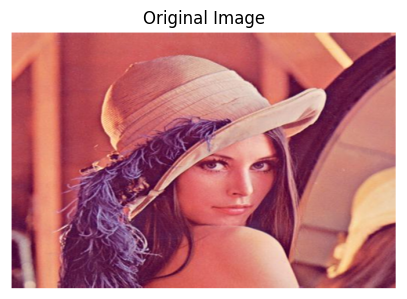

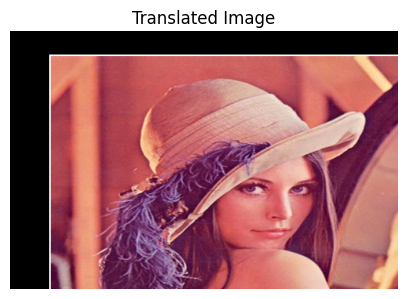

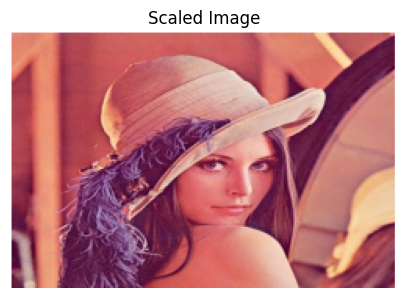

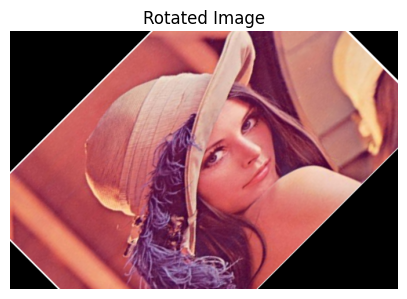

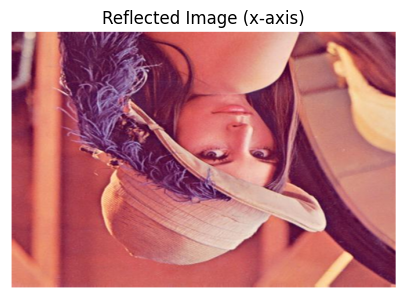

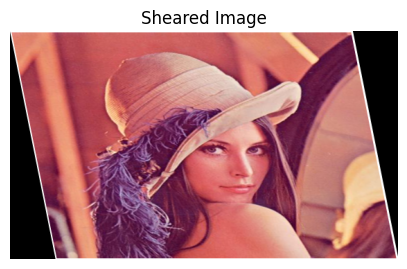

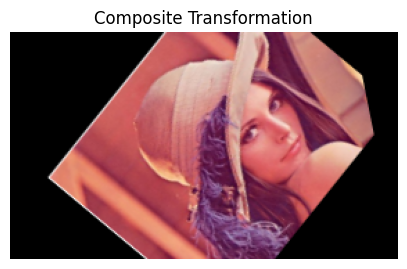

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("Screenshot 2025-01-17 093617.png")
if image is None:
    raise Exception("Image not found!")

def plot_image(img, title="Figure", cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

def translate_image(img, tx, ty):
    rows, cols, _ = img.shape
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

def scale_image(img, sx, sy):
    return cv2.resize(img, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

def rotate_image(img, angle):
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)

def shear_image(img, shx, shy):
    rows, cols, _ = img.shape
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    n_cols = cols + abs(shx * rows)
    n_rows = rows + abs(shy * cols)
    return cv2.warpAffine(img, M, (int(n_cols), int(n_rows)))

def composite_transform(img):
    # Apply translation
    img = translate_image(img, 50, 30)
    # Apply scaling
    img = scale_image(img, 0.5, 0.5)
    # Apply rotation
    img = rotate_image(img, 45)
    # Apply shearing
    img = shear_image(img, 0.2, 0.0)
    return img

# Plot original image
plot_image(image, "Original Image")

# Apply transformations
translated_img = translate_image(image, 50, 30)
plot_image(translated_img, "Translated Image")

scaled_img = scale_image(image, 0.5, 0.5)
plot_image(scaled_img, "Scaled Image")

rotated_img = rotate_image(image, 45)
plot_image(rotated_img, "Rotated Image")

reflected_img = reflect_image(image, 'x')
plot_image(reflected_img, "Reflected Image (x-axis)")

sheared_img = shear_image(image, 0.2, 0)
plot_image(sheared_img, "Sheared Image")

composite_img = composite_transform(image)
plot_image(composite_img, "Composite Transformation")

plt.show()